training with Ridge regression ( lambda = 0.1 )
RIDGE Epoch 0: Loss = 89.5896, weight = 0.6225, bias = 0.1803
RIDGE Epoch 100: Loss = 0.9650, weight = 2.4184, bias = 1.4550
RIDGE Epoch 200: Loss = 0.6802, weight = 2.2782, bias = 1.9656
RIDGE Epoch 300: Loss = 0.5396, weight = 2.1796, bias = 2.3244
RIDGE Epoch 400: Loss = 0.4701, weight = 2.1104, bias = 2.5765
RIDGE Epoch 500: Loss = 0.4358, weight = 2.0617, bias = 2.7537
RIDGE Epoch 600: Loss = 0.4189, weight = 2.0276, bias = 2.8782
RIDGE Epoch 700: Loss = 0.4106, weight = 2.0035, bias = 2.9657
RIDGE Epoch 800: Loss = 0.4064, weight = 1.9867, bias = 3.0271
RIDGE Epoch 900: Loss = 0.4044, weight = 1.9748, bias = 3.0703

 Training with LASSO regression (lambda = 0.1)
LASSO Epoch 0: Loss = 89.5896, weight = 0.6225, bias = 0.1803
LASSO Epoch 100: Loss = 0.6656, weight = 2.4570, bias = 1.3745
LASSO Epoch 200: Loss = 0.4403, weight = 2.3312, bias = 1.8287
LASSO Epoch 300: Loss = 0.3258, weight = 2.2415, bias = 2.1523
LASSO Epoch 400: Loss = 

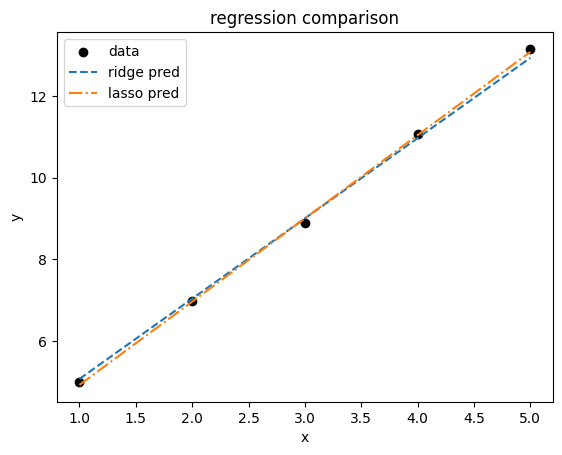

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

def predict(x, w, b):
    return w * x + b

def mse_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def mse_with_reg(y_true, y_pred, w, lam=0.1, penalty='ridge'):
    reg = lam * (w**2) if penalty == "ridge" else lam * np.abs(w)
    return mse_loss(y_true, y_pred) + reg
    
def compute_gradients(x, y, w, b, lam = 0.1 , penalty = "ridge"):
    n = float(len(x))
    y_pred = predict(x,w,b)
    dw = (2/n) * np.sum((y_pred - y)*x)
    db = (2/n) * np.sum(y_pred - y)
    
    if penalty == "ridge":
        dw += 2*lam*w
    elif penalty == "lasso":
        dw += lam*np.sign(w)
        
    return dw, db

def train(x, y, lr = 0.01, epochs = 1000, lam = 0.1, penalty = "ridge"):
    w, b = 0.0, 0.0 # random guess
    
    for i in range(epochs):
        y_pred = predict(x, w, b)
        
        loss = mse_with_reg(y, y_pred, w, lam , penalty)
        dw , db = compute_gradients(x, y, w, b, lam, penalty)
        
        w -= lr * dw
        b -= lr * db
        
        if i %100 == 0:
            
            print(f"{penalty.upper()} Epoch {i}: Loss = {loss:.4f}, weight = {w:.4f}, bias = {b:.4f}")
        
    return w, b
    
def main():
    x = np.array([1,2,3,4,5], dtype = float)
    y = 2*x + 3 + np.random.randn(5)*0.1    ## dataset  y= 2x +3 + noise
    
    print("training with Ridge regression ( lambda = 0.1 )")
    w_ridge , b_ridge= train(x, y, lr = 0.01, epochs=1000, lam = 0.1, penalty="ridge")
    
    print("\n Training with LASSO regression (lambda = 0.1)")
    w_lasso , b_lasso = train(x, y, lr= 0.01, epochs=1000, lam = 0.1 , penalty="lasso")
    
    y_pred_ridge = predict(x, w_ridge, b_ridge)
    y_pred_lasso = predict(x, w_lasso, b_lasso)
    
    mse_ridge = mse_loss(y, y_pred_ridge)
    mse_lasso = mse_loss(y, y_pred_lasso)
    
    print("Final results \n")
    print(f"RIDGE   -> w: {w_ridge:.4f}, b: {b_ridge:.4f}, MSE: {mse_ridge:.6f}")
    print(f"LASSO   -> w: {w_lasso:.4f}, b: {b_lasso:.4f}, MSE: {mse_lasso:.6f}")
    
    ## plotting the results 
    
    plt.scatter(x, y, color = "black", label = 'data')
    plt.plot(x, y_pred_ridge, label = "ridge pred", linestyle = '--')
    plt.plot(x, y_pred_lasso, label = 'lasso pred', linestyle = '-.')
    plt.legend()
    plt.title("regression comparison")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
if __name__ == "__main__":
    main() 

Verify using scikit-learn

Sklearn Coeff: 1.9608305116435314 Intercept: 3.1178735931728987 MSE :  0.003712231213883832


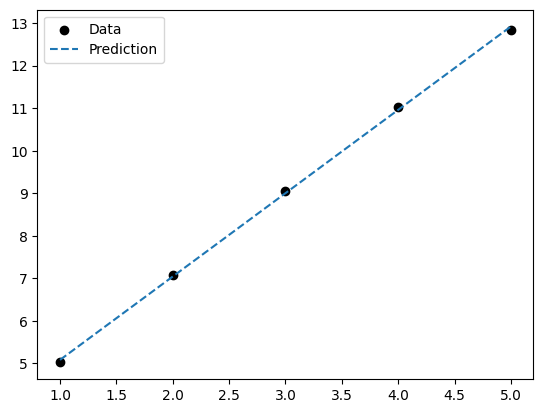

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = 2 * x.flatten() + 3 + np.random.randn(5) * 0.1

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x) 
mse = np.mean((y - y_pred) ** 2)

print("Sklearn Coeff:", model.coef_[0], "Intercept:", model.intercept_, "MSE : ", mse)

plt.scatter(x, y, color='black', label='Data')
plt.plot(x, y_pred, linestyle='--', label='Prediction')
plt.legend()
plt.show()

## ElasticNet 

Now, trying to combine both L1 + L2 regression defined with parameter  0 < alpha < 1

alpha = 1 => pure LASSO

alpha = 0 => pure ridge 

### Note for Instance vairables 

####  Accessing Instance variables 
``` bash
    class Student:
        def __init__(self,name,age):
            self.name=name
            self.age=age

        def display(self):
            print("Name:",self.name)
            print("Age:",self.age)
            
            
    s1=Student("Sachin",20)
    s1.display()
```

#### Modifying Instance variables
``` bash
    class Student:
        def __init__(self,name,age):
            self.name=name
            self.age=age

        def increment_age(self):
            self.age += 1
        
        def display(self):
            print("Name:",self.name)
            print("Age:",self.age)
            
    s1=Student("Sachin",20)
    s1.increment_age()
    s1.display()
```

#### Local variables vs. Instance variables
``` bash
    class Student:
        def __init__(self,value):
            self.value = value
        
        def calculate(self, x):
            return self.value + x
    
    s1=Student(15)
    print(s1.calculate(5))  # output 20
```

#### We will be using grid_Search with itertools to get the best hyperparameters and make it to the multi-feature case

Epoch 0, Loss: 14.475110
Epoch 100, Loss: 9.699426
Epoch 200, Loss: 6.508648
Epoch 300, Loss: 4.376754
Epoch 400, Loss: 2.952323
Epoch 500, Loss: 2.000572
Epoch 600, Loss: 1.364638
Epoch 700, Loss: 0.939719
Epoch 800, Loss: 0.655792
Epoch 900, Loss: 0.466071
learning rate = 0.001, lambda = 0.1, alpha = 0.001 -> MSE : 0.3393
Epoch 0, Loss: 9.546159
Epoch 100, Loss: 6.423017
Epoch 200, Loss: 4.330680
Epoch 300, Loss: 2.928925
Epoch 400, Loss: 1.989822
Epoch 500, Loss: 1.360671
Epoch 600, Loss: 0.939171
Epoch 700, Loss: 0.656787
Epoch 800, Loss: 0.467604
Epoch 900, Loss: 0.340860
learning rate = 0.001, lambda = 0.1, alpha = 0.01 -> MSE : 0.2559
Epoch 0, Loss: 10.923832
Epoch 100, Loss: 7.338366
Epoch 200, Loss: 4.938444
Epoch 300, Loss: 3.332053
Epoch 400, Loss: 2.256806
Epoch 500, Loss: 1.537078
Epoch 600, Loss: 1.055318
Epoch 700, Loss: 0.732843
Epoch 800, Loss: 0.516987
Epoch 900, Loss: 0.372498
learning rate = 0.001, lambda = 0.1, alpha = 0.1 -> MSE : 0.2758
Epoch 0, Loss: 15.624197
E

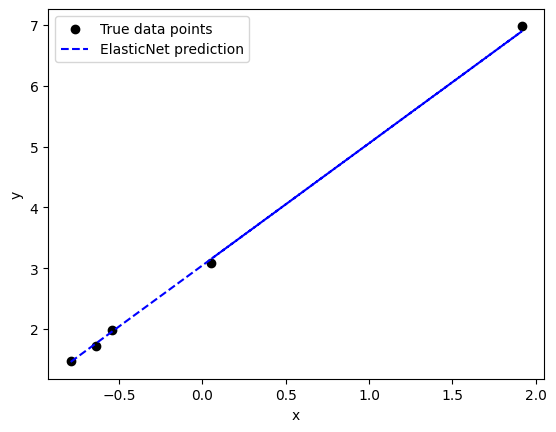

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

np.random.seed(42)

class ElasticNet:
    def __init__(self, lr = 0.01, epochs = 1000, lamb = 0.1, alpha = 0.5, verbose = True):
        self.lr = lr
        self.epochs = epochs
        self.lamb = lamb
        self.alpha = alpha
        self.verbose = verbose
        #random guess
        self.w = None
        self.b = 0.0
        
    def predict(self, x):
        return np.dot(x, self.w ) + self.b
        
        
    def loss(self, x, y):
        n = float(len(x))
        
        y_pred = self.predict(x)
        loss = (1/n) * np.sum((y - y_pred)**2) + (self.alpha * self.lamb / n) * np.sum(np.abs(self.w)) + ((1 - self.alpha) * self.lamb / n) * np.sum(self.w**2)
        return loss
    
    
    def compute_gradients(self, x, y):
        
        n = float(len(x))
        y_pred = self.predict(x)
        
        dw = (-2/n)*np.dot(x.T, (y - y_pred)) + 2*(1-self.alpha)*self.lamb*self.w/n + self.alpha*self.lamb*np.sign(self.w)/n
        
        db = (-2/n)*np.sum(y - y_pred)
        
        return dw, db
    
    def train(self, x, y):
        for i in range(self.epochs):
            loss_func = self.loss(x, y)
            
            dw , db = self.compute_gradients(x, y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            if self.verbose and i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss_func:.6f}")
        return self.w, self.b
    
    def fit(self, x, y):
        
        if self.w is None:
            self.w = np.random.randn(x.shape[1])
        self.train(x, y)
        


def r2_score(y, y_pred):
    ssr = np.sum((y - y_pred)**2)
    sst = np.sum((y - np.mean(y))** 2)
    return 1 - ssr/sst

def grid_search(x, y, learning_rates, alphas, lambdas,  epochs = 1000):
    best_loss = float("inf")
    best_model = None
    best_params = {}
    
    for lr, lamb, alpha in itertools.product(learning_rates, alphas, lambdas):
        model = ElasticNet(lr = lr, epochs=epochs, lamb=lamb, alpha=alpha)
        model.fit(x, y)
        
        y_pred = model.predict(x)
        loss = model.loss(x, y)
        
        print(f"learning rate = {lr}, lambda = {lamb}, alpha = {alpha} -> MSE : {loss:.4f}")
        
        if loss < best_loss:
            best_loss = loss
            best_model = model
            best_params = {'lr' : lr , 'lamb' : lamb, 'alpha' : alpha}
            
    print("Best parameters : \n", best_params)
    print(f"Best MSE : {best_loss:.4f}")
    
    return best_model, best_params

def main():
    x_org = np.array([27.89, 45.23, 56.12, 333, 123.12])
    x = ((x_org - np.mean(x_org))/ np.std(x_org)).reshape(-1, 1)         ## Normalize the data and convert to 2D 
    
    y = (2*x + 3 + np.random.randn(5, 1)*0.1).flatten() # y = 2x+3 + noise

    
    learning_rates = [0.001, 0.01, 0.1]
    lambdas = [0.001, 0.01, 0.1]
    alphas = [0.1, 0.5, 0.9]
    
    best_model , best_params = grid_search(x, y, learning_rates, alphas, lambdas)
    if best_model is None: 
        print("No valid model found.")
        return 
    
    y_pred = best_model.predict(x)
    
    mse = np.mean((y - y_pred)**2)
    r2_coeff = r2_score(y , y_pred)
    
    print(f"Final MSE : {mse:.4f} \n")
    print(f"Final R_sqared Score : {r2_coeff:.4f}")


    plt.scatter(x.flatten(), y, color = 'black', label = 'True data points')
    plt.plot(x.flatten(), y_pred, label = 'ElasticNet prediction', color = 'Blue', linestyle = '--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    

if __name__ == "__main__":
    main()
